## Species Abundance Simulation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
    

def lotka_volterra(N, alpha):
    np.dot(alpha, N)  
    dNdt = N * (1 - N) - N * np.dot(alpha, N) 
    return dNdt



def rk4_step(f, N, t, dt, h):
    k1 = f(N, h)
    k2 = f(N + 0.5 * dt * k1, h)
    k3 = f(N + 0.5 * dt * k2, h)
    k4 = f(N + dt * k3, h)
    return N + (dt / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)



def solve_lotka_volterra(alpha, N0, t_max, dt):
    t_values = np.arange(0, t_max, dt)
    N_values = np.zeros((len(t_values), len(N0)))
    N_values[0] = N0
    for i in range(1, len(t_values)):
        N_values[i] = rk4_step(lotka_volterra, N_values[i-1], t_values[i-1], dt, alpha)
    return t_values, N_values

# Parameters
S = 100
mu = 4 
sigma = 1



# Parameters for distribution
alpha_mean = mu / S
alpha_std = sigma / np.sqrt(S)



# Interaction Matrix
alpha = np.random.normal(alpha_mean, alpha_std,size=(S,S))
np.fill_diagonal(alpha, 0)

# Initial Abundances
N0 = np.random.uniform(0, 1, size=S)

# Max Time and Time step
t_max = 10000
dt = 0.1

# Generative Values
t_values, N_values = solve_lotka_volterra(alpha, N0, t_max, dt)



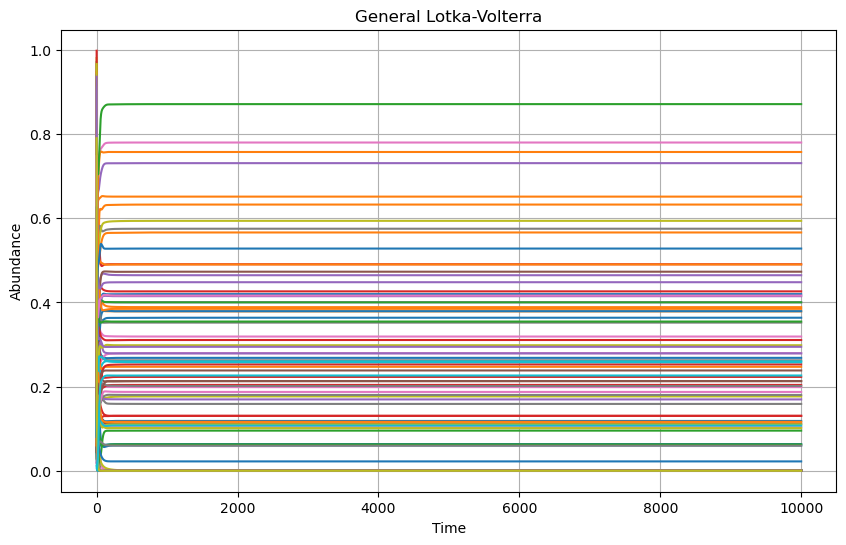

In [4]:
# Plotting results
plt.figure(figsize=(10, 6))
for i in range(S):
    plt.plot(t_values, N_values[:, i])
plt.xlabel('Time')
plt.ylabel('Abundance')
plt.title('General Lotka-Volterra')
plt.grid(True)
plt.show()

In [18]:
a = 0
for i in N_values[-1]:
    if a ==0:
        a = a +1
print(a)

print(N_values[-1])
    

1
[2.68299103e-001 3.78747843e-001 4.44659081e-323 1.30616173e-001
 2.47032823e-322 1.25620113e-196 1.98810069e-001 8.89318163e-323
 1.76601421e-001 1.08694442e-322 6.01967766e-002 5.66331442e-001
 1.33397724e-322 2.03938984e-001 4.00483856e-001 9.88131292e-323
 1.03412635e-001 1.58774916e-001 3.45845952e-323 4.94065646e-323
 6.33675114e-002 6.51536006e-001 9.53009949e-002 1.30242237e-001
 1.69496373e-001 1.18575755e-322 3.18950488e-001 1.80116967e-001
 2.02566915e-322 5.92878775e-323 1.18300841e-001 6.32665872e-001
 1.82804289e-322 4.26319132e-001 4.64675704e-001 4.73072985e-001
 2.79308778e-001 2.62496660e-001 1.01222535e-001 1.97626258e-322
 3.79192026e-001 3.88807248e-001 7.90505033e-323 2.22988772e-001
 4.14864335e-001 3.50786609e-322 7.80143294e-001 2.01448116e-001
 6.42285340e-323 2.59928237e-001 3.63684085e-001 2.47018346e-001
 4.00279744e-001 3.10717317e-001 2.78945447e-001 1.11861693e-001
 3.83609798e-087 3.52068366e-001 1.10298575e-001 1.07408269e-001
 4.19773537e-001 3.8480

/var/folders/zm/5zxxsy2d75bdst_608fxx_hh0000gn/T/ipykernel_3097/1200901332.py:7: RuntimeWarning: overflow encountered in multiply
  dNdt = N * (1 - N) - N * np.dot(alpha, N)
/var/folders/zm/5zxxsy2d75bdst_608fxx_hh0000gn/T/ipykernel_3097/1200901332.py:7: RuntimeWarning: invalid value encountered in subtract
  dNdt = N * (1 - N) - N * np.dot(alpha, N)


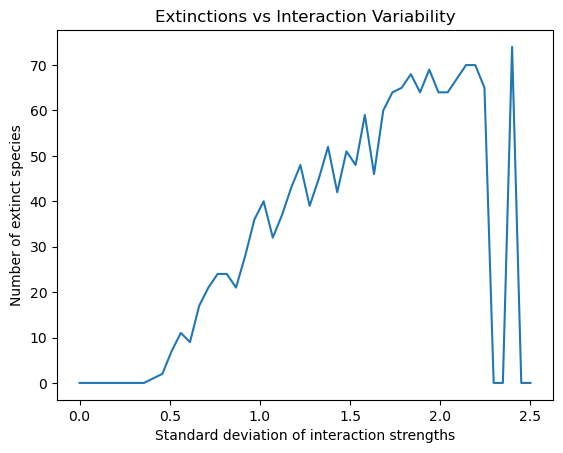

In [183]:
import numpy as np
from scipy.stats import norm
import scipy.optimize as opt


n0 = np.random.uniform(0, 1, size=S)
sigs = np.linspace(0,2.5,50)
mean = 4/S
b = []

for i in sigs:
    aleph = np.random.normal(mean, i/np.sqrt(S),size=(S,S))
    np.fill_diagonal(aleph, 0)
    ts, Ns = solve_lotka_volterra(aleph, n0, 200, 0.1)
    extinctions = np.sum(Ns[-1] < 0.01)
    b.append(extinctions)
    
b = np.array(b)

plt.plot(sigs, b)
plt.xlabel("Standard deviation of interaction strengths")
plt.ylabel("Number of extinct species")
plt.title("Extinctions vs Interaction Variability")
plt.show()



def w2(x):
    return (x**2+1)*norm.cdf(x)+x*norm.pdf(x)
def w1(x):
    return x*norm.cdf(x) + norm.pdf(x)
def w0(x):
    return norm.cdf(x)

def findDelta_zeroGam(sig):
    def findRootOf(delt):
        return w2(delt)-sig**(-2) 
    a = opt.newton(findRootOf,0)
    return a

def fullCav_zeroGam(mu,sig):
    delt = findDelta_zeroGam(sig)
    phi_K = w0(delt)
    m = w1(delt) / (mu*w1(delt) + delt)
    q = ( 1/sig / (mu*w1(delt) + delt) )**2
    return phi_K, m, q, delt 



    
    
    
    

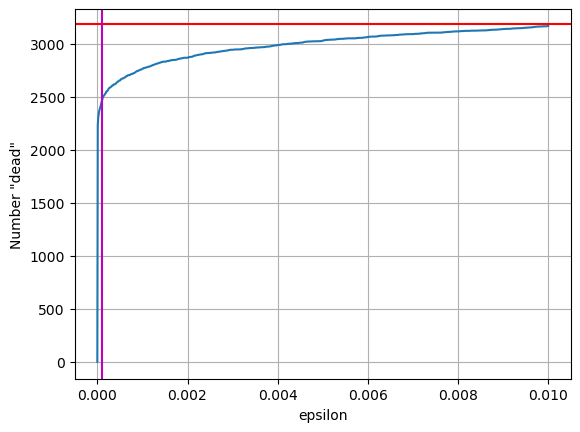

In [126]:
def dead(epsilon_array):
    return [np.sum(N_values[-1] < epsilon) for epsilon in epsilon_array]

a = (1- 0.681056563702052)*S
xs = np.linspace(0,0.01,1000)
ys = dead(xs)
plt.plot(xs, ys)
plt.axhline(y=a, color = 'r')
plt.axvline(x=1/S, color = 'm')
plt.xlabel('epsilon')
plt.ylabel('Number "dead"')
plt.grid(True)
plt.show()


            

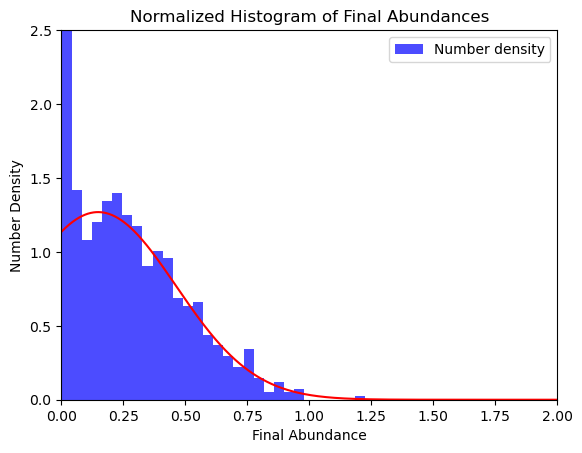

In [44]:
# Plotting Histogram

0.0048


import numpy as np
from scipy.stats import norm
import scipy.optimize as opt





mean = 1 -(4*0.2130137731416583)
varience = (1**2)*0.09880843862243661
stabby = np.sqrt(varience)
x = np.linspace(0, 2, 1000)


final_abundances = N_values[-1] 
bin_edges = np.linspace(0, 2, 50)
hist, edges = np.histogram(final_abundances, bins=bin_edges) 
bin_width = edges[1] - edges[0]
number_density = hist / (len(final_abundances) * bin_width)
plt.bar(edges[:-1], number_density, width=bin_width, align='edge', alpha=0.7, color='blue', label='Number density')
plt.plot(x, norm.pdf(x, mean, stabby),color='r')
plt.ylim(0,2.5)
plt.xlim(0,2)
plt.xlabel("Final Abundance")
plt.ylabel("Number Density")
plt.title("Normalized Histogram of Final Abundances")
plt.legend()
plt.show()


## $d_1$ and $d_2$

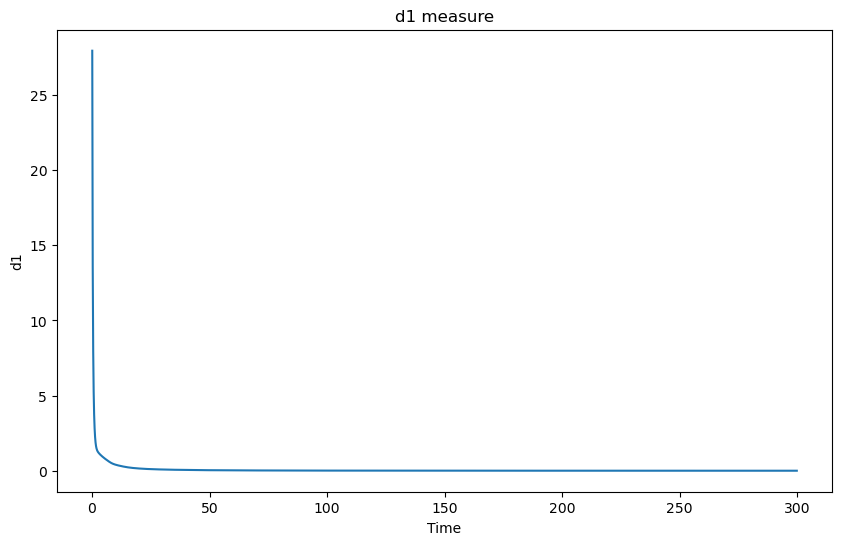

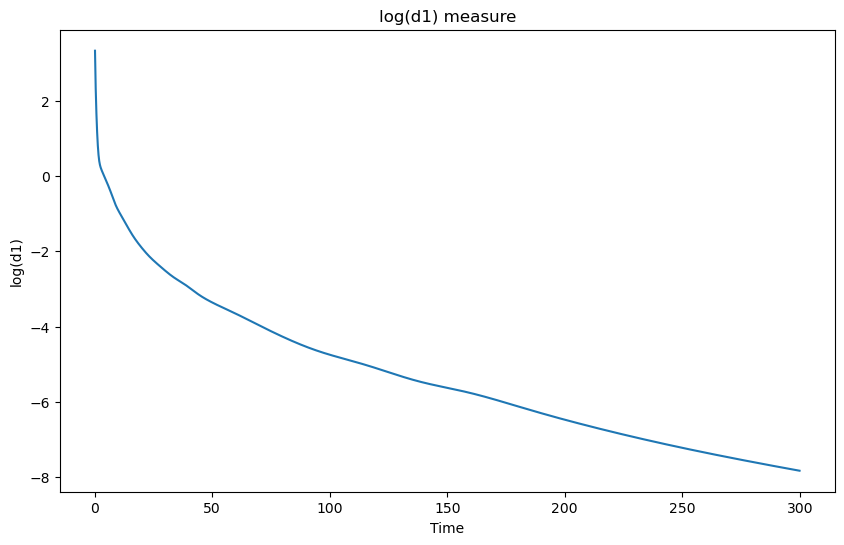

In [39]:
import numpy as np
from numpy import linalg as LA

d1_values = []
for i in range(1,len(N_values)):
    Vec = N_values[i] - N_values[i-1]
    diff = LA.norm(Vec)
    d1 = diff/dt
    d1_values.append(d1)
    
t_d1 = t_values[1:]
plt.figure(figsize=(10, 6))
plt.plot(t_d1, d1_values,)
plt.xlabel('Time')
plt.ylabel('d1')
plt.title('d1 measure')
plt.show()

#plot of log(d1) throughout simulation
log_d1_values = []
for i in range(1,len(N_values)):
    Vec = N_values[i] - N_values[i-1]
    diff = LA.norm(Vec)
    d1 = diff/dt
    log_d1 = np.log(d1)
    log_d1_values.append(log_d1)
    
t_d1 = t_values[1:]
plt.figure(figsize=(10, 6))
plt.plot(t_d1, log_d1_values,)
plt.xlabel('Time')
plt.ylabel('log(d1)')
plt.title('log(d1) measure')
plt.show()
    

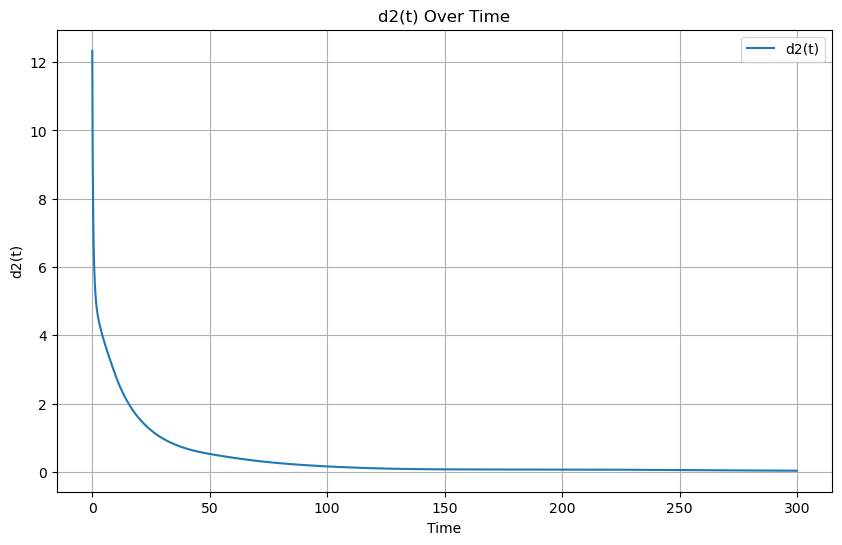

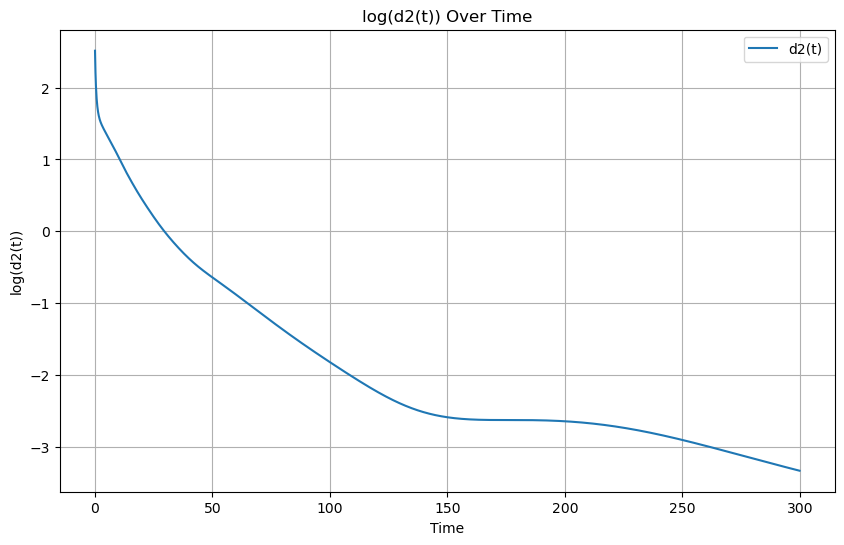

In [41]:
#Plotting d2 values in time
N0_1 = np.random.uniform(0, 1, size=S)  
N0_2 = np.random.uniform(0, 1, size=S)

t_values, N_values1 = solve_lotka_volterra(alpha, N0_1, t_max, dt)
t_values, N_values2 = solve_lotka_volterra(alpha, N0_2, t_max, dt)

d2_values = []
for i in range(len(t_values)):
    difference = np.linalg.norm(N_values1[i] - N_values2[i])
    d2_values.append(difference)

plt.figure(figsize=(10, 6))
plt.plot(t_values, d2_values, label='d2(t)')
plt.xlabel('Time')
plt.ylabel('d2(t)')
plt.title('d2(t) Over Time')
plt.grid(True)
plt.legend()
plt.show()

#Plotting log(d2) values in time

log_d2_values = []
for i in range(len(t_values)):
    difference = np.linalg.norm(N_values1[i] - N_values2[i])
    loggywoggy = np.log(difference)
    log_d2_values.append(loggywoggy)

plt.figure(figsize=(10, 6))
plt.plot(t_values, log_d2_values, label='d2(t)')
plt.xlabel('Time')
plt.ylabel('log(d2(t))')
plt.title('log(d2(t)) Over Time')
plt.grid(True)
plt.legend()
plt.show()

## Finding $\Delta , M \text{ and } q$

In [11]:
##### ALL TOGETHER NOWWW!!!!!
import numpy as np
from scipy import optimize
from scipy import special
Sigma_2 = 1
Mu_2 = 4
range_start = 2
range_end = -2

# the Root of f is the Delta solution 
def f(delta):
    term = (0.5 * (delta**2 + 1) * (special.erf(delta / np.sqrt(2)) + 1) + (np.exp(-delta**2 / 2) * delta) / np.sqrt(2 * np.pi))
    ans = term - 1/(Sigma_2**2)
    return ans

# Finds Delta from the region range_start to range_end.
def find_Delta(range_start,range_end):
    delta = optimize.bisect(f, range_start, range_end)
    return delta

# Integral Function for solving M
def I(D):
    term_1 = 0.5 * (D) * (special.erf(D / np.sqrt(2)) + 1) 
    term_2 = np.exp((-D**2) / 2) / np.sqrt(2 * np.pi)
    return term_1 + term_2

D = find_Delta(range_start,range_end)
# Solving for M
def find_M(D):
    t1 = I(D)
    t2 = D + (Mu_2 * t1)
    ans = t1/t2
    return ans

def Solve_q():
    M = find_M(D)
    Del = find_Delta(range_start,range_end)
    who = (1 + Mu_2*M )/(Sigma_2*Del)
    q = who**2
    return q

print("Delta=", find_Delta(range_start,range_end))
print(r"M=" ,find_M(D))
print(r"q=" ,Solve_q())

Delta= 0.4706553526175412
M= 0.21301377314168596
q= 15.484664440872876


## Plotting Distribution 

In [1]:

Delta = 0.4706553526175412
M= 0.21301377314168596
q= 15.484664440872876


In [87]:
## Calculate Phi
from scipy.stats import norm
def phi(delta):
    ans = 0.5*(special.erf(delta / np.sqrt(2)) + 1) 
    return ans

print(1 - phi(Delta))

def number_dead():
    a = 0
    for i in final_abundances:
        if i < 0.0416:
            a = a+1
    return a 

threshold = 0.05

extinct_count = np.sum(final_abundances <= threshold)
print(extinct_count/S)



            



0.31894343629822774
0.382


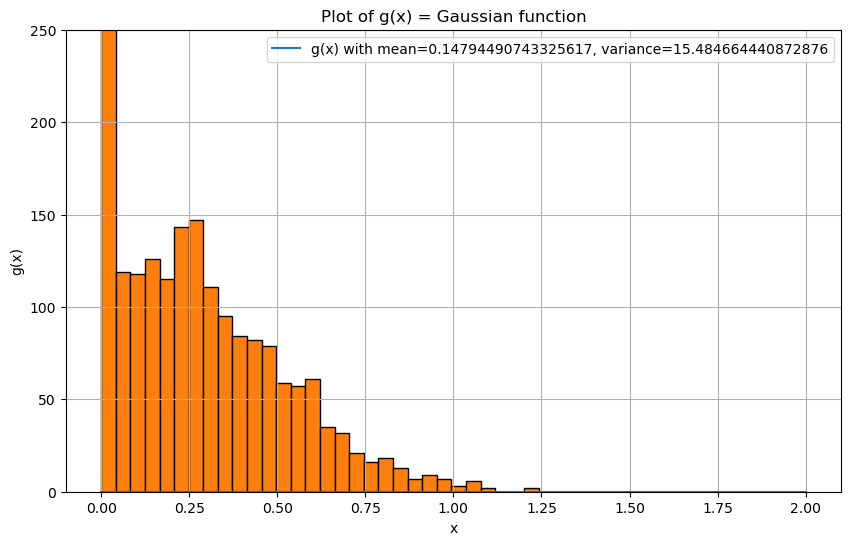

In [113]:
m = 1 - Mu_2 * M
v = (Sigma_2**2) * q

def g(x):
    a = 1/(np.sqrt(2*np.pi*v))
    b = ((x-m)/v)**2
    ans = (a * np.exp(-0.5*b))
    return ans

x_vals = np.linspace(0, 2, 1000)
g_vals = g(x_vals)


plt.figure(figsize=(10, 6))
plt.plot(x_vals, g_vals, label=f"g(x) with mean={m}, variance={v}")
plt.hist(final_abundances, bins=30, edgecolor='black', alpha=1)
plt.ylim(0, S//10)
plt.xlabel("x")
plt.ylabel("g(x)")
plt.title("Plot of g(x) = Gaussian function")
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
#### log(d1) agaisnt Sigma plot
#### S=100, mu = 4, sigma varys 

import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

aleph_mean = 4/100
sigs = np.linspace(0.1,5,25)
ss = 1000
dtdt = 0.005

vallywallys = []
for i in sigs:
    x = i/(np.sqrt(ss))
    aleph = np.random.normal(aleph_mean, x,size=(ss,ss))
    np.fill_diagonal(aleph, 0)
    n0 = np.random.uniform(0, 1, size=ss)
    ts, Ns = solve_lotka_volterra(aleph, n0, ss, dtdt)
    Vec = Ns[-1] - Ns[-2]
    diff = LA.norm(Vec)
    d1 = diff/dtdt
    logd1 = np.log(d1)
    vallywallys.append(logd1)



plt.figure(figsize=(10, 6))
plt.scatter(sigs, vallywallys ,)
plt.xlabel('sigma')
plt.ylabel('log(d1)')
plt.title('log(d1) - sigma')
plt.show()





In [179]:
import numpy as np
from scipy.stats import norm
import scipy.optimize as opt


def w2(x):
    return (x**2+1)*norm.cdf(x)+x*norm.pdf(x)
def w1(x):
    return x*norm.cdf(x) + norm.pdf(x)
def w0(x):
    return norm.cdf(x)

def findDelta_zeroGam(sig):
    def findRootOf(delt):
        return w2(delt)-sig**(-2) 
    a = opt.newton(findRootOf,0)
    return a

def fullCav_zeroGam(mu,sig):
    delt = findDelta_zeroGam(sig)
    phi_K = w0(delt)
    m = w1(delt) / (mu*w1(delt) + delt)
    q = ( 1/sig / (mu*w1(delt) + delt) )**2
    return phi_K, m, q, delt 



In [62]:
print(findDelta_zeroGam(1))

0.4706553526183246


In [14]:
print(fullCav_zeroGam(4,1))

(0.681056563702052, 0.2130137731416583, 0.09880843862243661, 0.4706553526183246)


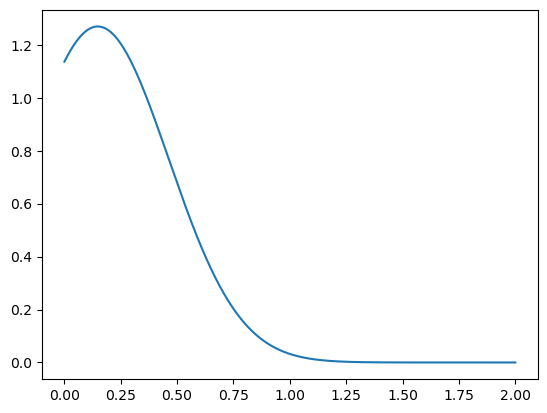

In [37]:

import matplotlib.pyplot as plt



mean = 1 -(4*0.2130137731416583)
varience = (1**2)*0.09880843862243661
stabby = np.sqrt(varience)


x = np.linspace(0, 2, 1000)
plt.plot(x, norm.pdf(x, mean, stabby))
plt.show()



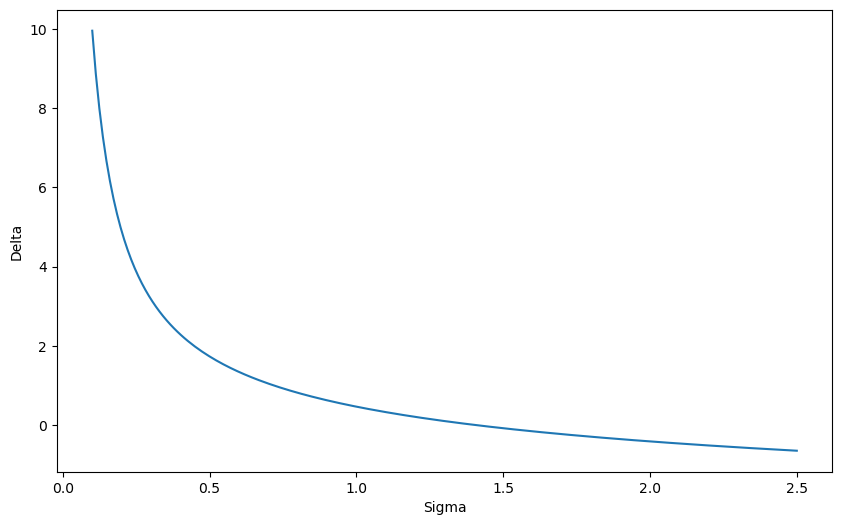

Delta_valleys shape: (200,)
phis shape: (200,)
sig_values length: 200, phis length: 200


In [92]:
###PLotting Sigma agaisnt Delta

sig_values = np.linspace(0.1,2.5,200)
Delta_valleys = np.array([findDelta_zeroGam(sig) for sig in sig_values])

plt.figure(figsize=(10, 6))
plt.plot(sig_values,Delta_valleys)
plt.xlabel('Sigma')
plt.ylabel('Delta')
plt.show()



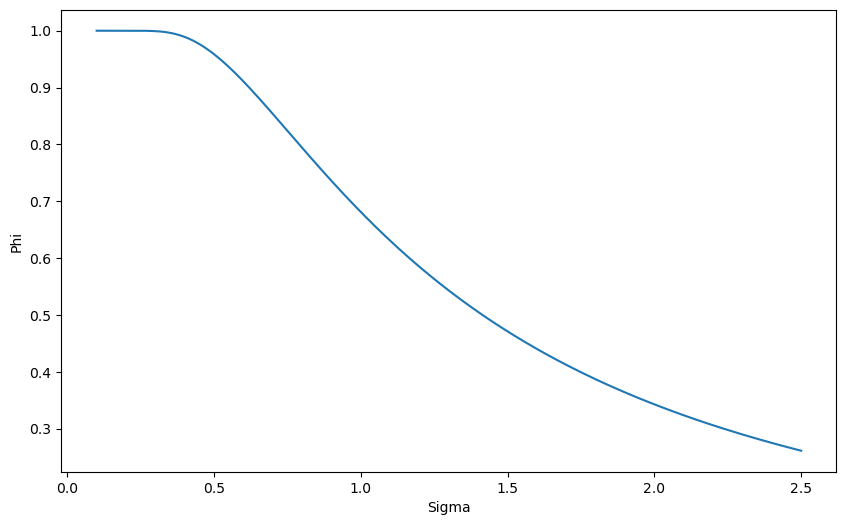

In [94]:
def phi(delt):
    ans = w0(delt)
    return ans
phis =  np.array([phi(delt) for delt in Delta_valleys])

plt.figure(figsize=(10, 6))
plt.plot(sig_values,phis)
plt.xlabel('Sigma')
plt.ylabel('Phi')
plt.show()
    

In [96]:

insigs = np.linspace(0.1,5,25)

def d1(i):
    Vec = N_values[i] - N_values[i-1]
    diff = LA.norm(Vec)
    d1 = diff/dt




In [ ]:
from numpy import linalg as LA

newspecies = 1000
newmean = 4

aleph_mean = newmean/newspecies





new_t_max = 300
new_dt = dt = 0.1

log_d1ss = []

for i in insigs:
    aleph_std = i / np.sqrt(S)
    aleph = np.random.normal(aleph_mean, aleph_std,size=(newspecies,newspecies))
    np.fill_diagonal(aleph, 0)
    n0 = np.random.uniform(0, 1, size=newspecies)
    new_t_values,new_N_values  = solve_lotka_volterra(aleph, n0, new_t_max, new_dt)
    Vec = new_N_values[-1] - new_N_values[-2]
    diff = LA.norm(Vec)
    d1 = diff/dt
    lgos = np.log(d1)
    log_d1ss.append(lgos)
    
    
plt.figure(figsize=(10, 6))
plt.scatter(insigs,log_d1ss)
plt.xlabel('Sigma')
plt.ylabel('Log(d1)')
plt.show()
    
    

/var/folders/zm/5zxxsy2d75bdst_608fxx_hh0000gn/T/ipykernel_1414/1703296796.py:26: RuntimeWarning: divide by zero encountered in log
  lgos = np.log(d1)
